In [1]:
# 安装 folium
! pip install folium --user

In [2]:
# 导入pandas 等
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 忽略警告信息
import warnings
warnings.filterwarnings('ignore')

import folium

# 设置中文字体 kesci 专用代码
plt.rcParams['font.sans-serif'].insert(0, 'Microsoft YaHei')

print('成功建立开发环境')

成功建立开发环境


In [3]:
# 读取疫情数据，查看基本情况
df = pd.read_csv('DXYArea.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27521 entries, 0 to 27520
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   provinceName             27521 non-null  object
 1   cityName                 27521 non-null  object
 2   province_confirmedCount  27521 non-null  int64 
 3   province_suspectedCount  27521 non-null  int64 
 4   province_curedCount      27521 non-null  int64 
 5   province_deadCount       27521 non-null  int64 
 6   city_confirmedCount      27521 non-null  int64 
 7   city_suspectedCount      27521 non-null  int64 
 8   city_curedCount          27521 non-null  int64 
 9   city_deadCount           27521 non-null  int64 
 10  updateTime               27521 non-null  object
dtypes: int64(8), object(3)
memory usage: 2.3+ MB


In [4]:
df.head()

,provinceName,cityName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
0,浙江省,温州,1075,0,190,0,448,0,71,0,2020-02-09 15:37:28.105
1,浙江省,杭州,1075,0,190,0,165,0,41,0,2020-02-09 15:37:28.105
2,浙江省,宁波,1075,0,190,0,146,0,13,0,2020-02-09 15:37:28.105
3,浙江省,台州,1075,0,190,0,138,0,27,0,2020-02-09 15:37:28.105
4,浙江省,金华,1075,0,190,0,53,0,13,0,2020-02-09 15:37:28.105


In [5]:
# 按省份统计确诊人数
province_confirmedCount = df.groupby('provinceName').province_confirmedCount.agg('max')
province_confirmedCount

provinceName
上海市           293
云南省           140
内蒙古自治区         54
北京市           326
吉林省            78
四川省           386
天津市            90
宁夏回族自治区        45
安徽省           779
山东省           435
山西省           115
广东省          1120
广西壮族自治区       195
新疆维吾尔自治区       45
江苏省           468
江西省           740
河北省           206
河南省          1033
浙江省          1075
海南省           128
湖北省         27100
湖南省           838
澳门              2
甘肃省            79
福建省           250
西藏自治区           1
贵州省            96
辽宁省           105
重庆市           446
陕西省           208
青海省            18
黑龙江省          307
Name: province_confirmedCount, dtype: int64

In [6]:
# 读取城市坐标数据
coord = pd.read_csv('china_coordinates.csv', 
  names=['postcode', 'city', 'lon', 'lat'])
coord.head()

,postcode,city,lon,lat
0,110000,北京市,116.395645,39.929986
1,110101,东城区,113.612838,37.857865
2,110102,西城区,113.612838,37.857865
3,110105,朝阳区,116.521695,39.958953
4,110106,丰台区,116.258370,39.841938


In [7]:
# 合并城市坐标数据 与 省份疫情数据
coord['confirm'] = coord['city']
coord['confirm'] = coord['confirm'].map(province_confirmedCount.to_dict() )
coord.head()

,postcode,city,lon,lat,confirm
0,110000,北京市,116.395645,39.929986,326.0
1,110101,东城区,113.612838,37.857865,NaN
2,110102,西城区,113.612838,37.857865,NaN
3,110105,朝阳区,116.521695,39.958953,NaN
4,110106,丰台区,116.258370,39.841938,NaN


In [8]:
# 清洗数据，去掉空值
df_prov = coord.dropna()
df_prov

,postcode,city,lon,lat,confirm
0,110000,北京市,116.395645,39.929986,326.0
17,120000,天津市,117.210813,39.143930,90.0
33,130000,河北省,115.661434,38.613840,206.0
214,140000,山西省,112.515496,37.866566,115.0
345,150000,内蒙古自治区,114.415868,43.468238,54.0
461,210000,辽宁省,122.753592,41.621600,105.0
575,220000,吉林省,126.262876,43.678846,78.0
645,230000,黑龙江省,128.047414,47.356592,307.0
787,310000,上海市,121.487899,31.249162,293.0
804,320000,江苏省,119.368489,33.013797,468.0


In [37]:
from pyecharts.charts import *
from pyecharts import options
from pyecharts.faker import Faker
#创建Map
feiyan_map=Map()
# 添加数据
feiyan_map.add("city", [list(z) for z in zip(Faker.provinces, Faker.values())], "china")
# 设置数据与颜色的一个映射
feiyan_map.set_global_opts(visualmap_opts=options.VisualMapOpts())
# 显示或者渲染地图
feiyan_map.render_notebook()

F:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [43]:
import sys
import json

with open("100000_full.json",'r',encoding='UTF−8', errors='ignore') as f:
    geo_json_data=json.load(f)
# 绘制地图 ： location 地图中心位置坐标（纬度lat, 经度lon）， zoom_start 地图放大系数
map = folium.Map(location=[39.929986, 116.395645], zoom_start=4)
# 取对数解决色彩条不均衡问题
df_prov['logconfirm'] = np.log(df_prov['confirm'])
folium.Choropleth(
    name='疫情热图',  # 名称
    geo_data=geo_json_data,  # 数据文件
    data=df_prov.set_index(df_prov.city),  # 数据集
    columns=['city', 'logconfirm'],  # 列名称
    key_on='feature.properties.name',  # 匹配geo_data 中的属性值
    fill_color='Reds',  # 色彩配置
#     bins = [0, 100, 500, 1000, 10000, 30000]  # 数据区间范围
).add_to(map)

#将确诊人数增加到地图上
for d in df_prov.itertuples():
    folium.Marker(
    location=[d.lat,d.lon],
    icon=folium.Icon(color='red') if d.confirm>1000 else \
        (folium.Icon(color='orange') if d.confirm>100 else folium.Icon(color='blue')),
    tooltip="{} 确诊 {} 例".format(d.city,int(d.confirm))
    ).add_to(map)
map


In [44]:
# 导入pandas等需要的库
import numpy as np
import pandas as pd
import warnings
import folium
import webbrowser as wb


def df():
    # 读取数据，查看基本情况
    df = pd.read_csv("DXYArea.csv")
    # df.info()
    # print(df.head())
    return df


def coord():
    # 读取城市坐标数据
    coord = pd.read_csv('china_coordinates.csv', names=['postcode', 'city', 'lon', 'lat'])
    # print(coord.head())
    return coord


def pc():
    # 按省份统计人数
    pc = df.groupby('provinceName').province_confirmedCount.agg('max')
    # print(province_confirmedCount)
    return pc


def merge(coord, pc):
    # 合并城市坐标数据 与 省份数据
    coord['confirm'] = coord['city']
    coord['confirm'] = coord['confirm'].map(pc.to_dict())
    # print(coord.head())
    return coord


def map(df_prov):
    # 绘制地图：location 地图中心位置坐标（纬度lat，经度lon）, zoom_start 地图放大系数
    map = folium.Map(location=[39.929986, 116.395645], zoom_start=4)
    # 取对数解决色彩条不均衡问题
    df_prov['logconfirm'] = np.log(df_prov['confirm'])
    folium.Choropleth(
        name='热图',  # 名称
        geo_data=open('100000_full.json', 'r', encoding='UTF-8').read(),  # 数据文件
        data=df_prov.set_index(df_prov.city),  # 数据集
        columns=['city', 'logconfirm'],  # 列名称
        key_on='feature.properties.name',  # 匹配geo_data 中的属性值
        fill_color='Reds',  # 色彩配置
        # bins = [0, 100, 500, 1000, 10000, 30000] # 数据区间范围
    ).add_to(map)

    # 将人数增加到地图上
    for d in df_prov.itertuples():
        folium.Marker(
            location=[d.lat, d.lon],
            icon=folium.Icon(color='red') if d.confirm > 1000 else (
                folium.Icon(color='orange') if d.confirm > 100 else folium.Icon(color='blue')),
            tooltip="{} 确诊 {} 例".format(d.city, int(d.confirm))
        ).add_to(map)

    # 存入html文件里，并用浏览器打开
    map.save('F:\guge\新冠状病毒\新冠状病毒可视化\map.html')
    wb.get(r"C:\Users\lenovo\AppData\Local\Google\Chrome\Application\chrome.exe %s").open('F:\guge\新冠状病毒\新冠状病毒可视化\map.html') # wb.get(浏览器地址)


if __name__ == "__main__":
    # 忽略警告信息
    warnings.filterwarnings('ignore')

    df = df()
    coord = coord()
    province_confirmedCount = pc()

    coord = merge(coord, province_confirmedCount)

    df_prov = coord.dropna()
    # print(df_prov)

    map(df_prov)

In [15]:
# 转换为时序数据
df['updateTime'] = pd.to_datetime(df['updateTime'])
df.index = pd.DatetimeIndex( df['updateTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27521 entries, 2020-02-09 15:37:28.105000 to 2020-01-24 03:50:31.353000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   provinceName             27521 non-null  object        
 1   cityName                 27521 non-null  object        
 2   province_confirmedCount  27521 non-null  int64         
 3   province_suspectedCount  27521 non-null  int64         
 4   province_curedCount      27521 non-null  int64         
 5   province_deadCount       27521 non-null  int64         
 6   city_confirmedCount      27521 non-null  int64         
 7   city_suspectedCount      27521 non-null  int64         
 8   city_curedCount          27521 non-null  int64         
 9   city_deadCount           27521 non-null  int64         
 10  updateTime               27521 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(8), object(2)
me

In [16]:
# 取出各个省份每天的数据
df_provconfirm = df[ ['provinceName', 'province_confirmedCount'] ].groupby([df.index.date, 'provinceName']).first()
df_provconfirm.head()

province_confirmedCount
           provinceName                         
2020-01-24 云南省                                 5
           内蒙古自治区                              2
           北京市                                36
           吉林省                                 3
           四川省                                15

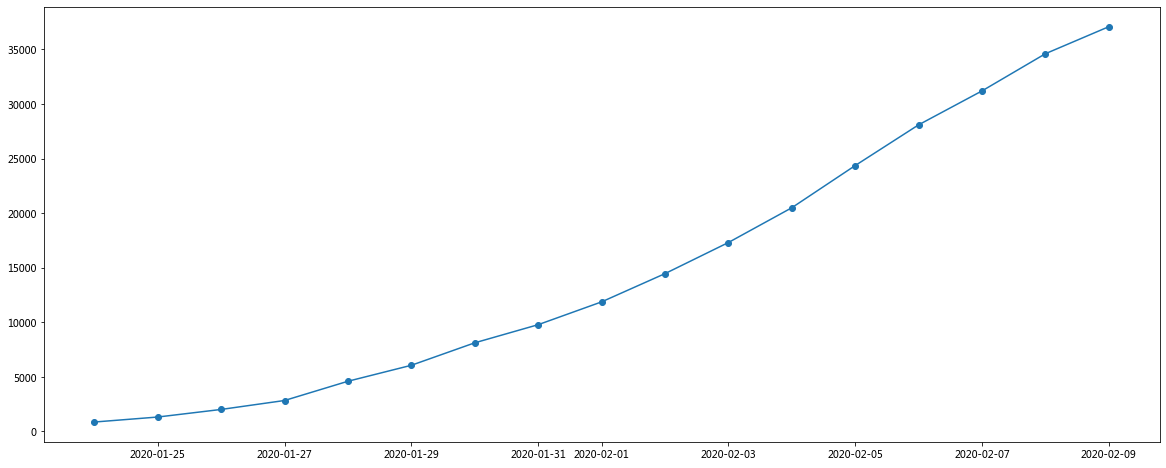

In [17]:
# 对数据进行按天汇总 sum
# unstack 讲省份由索引变为列
# fillna 填充空值
# sum 按行（axis=1）求和 （汇总）
# plot.line 绘制线形图
df_provconfirm.unstack().fillna(value=0).sum(axis=1).plot.line(figsize=(20,8), marker='o')

In [16]:
# 使用 seaborn
sns.set()
plt.figure( figsize=(20, 8))
sns.lineplot(data=df_provconfirm.unstack().fillna(value=0).sum(axis=1), marker = 'o' )

<Figure size 1440x576 with 1 Axes>

In [18]:
df_totalconfirm = df_provconfirm.unstack().fillna(value=0).sum(axis=1)

In [20]:
df_totalconfirm.head()

2020-01-24     866.0
2020-01-25    1324.0
2020-01-26    2019.0
2020-01-27    2838.0
2020-01-28    4601.0
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC93148>,
      dtype=object)

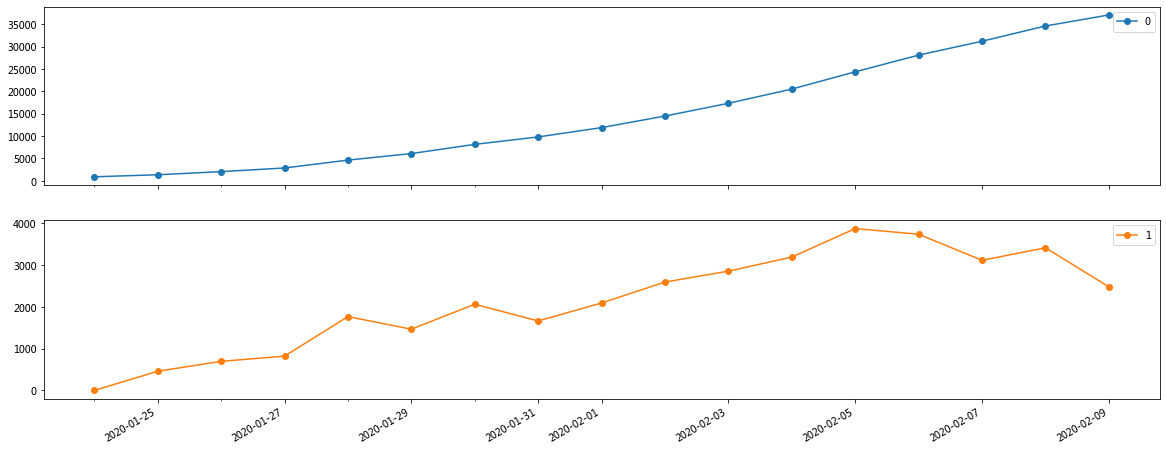

In [21]:
pd.DataFrame( [df_totalconfirm, df_totalconfirm.diff()]).T.fillna(value=0)\
.plot.line(figsize=(20,8), marker='o', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CFA3BC8>,
      dtype=object)

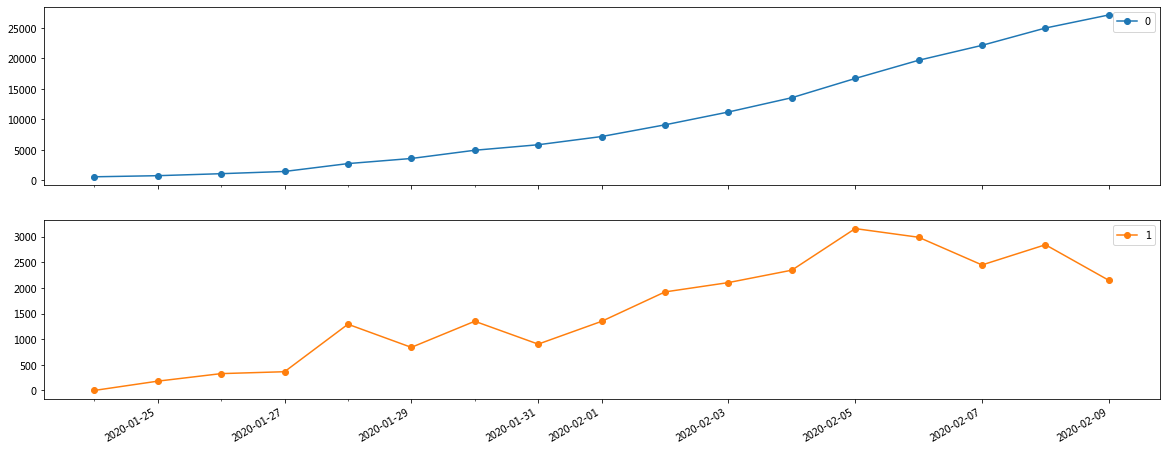

In [22]:
# 湖北省数据
df_hubei = df_provconfirm.unstack()[ [('province_confirmedCount', '湖北省')] ].sum(axis=1)
pd.DataFrame( [df_hubei, df_hubei.diff()]).T.fillna(value=0)\
.plot.line(figsize=(20,8), marker='o', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D827D08>,
      dtype=object)

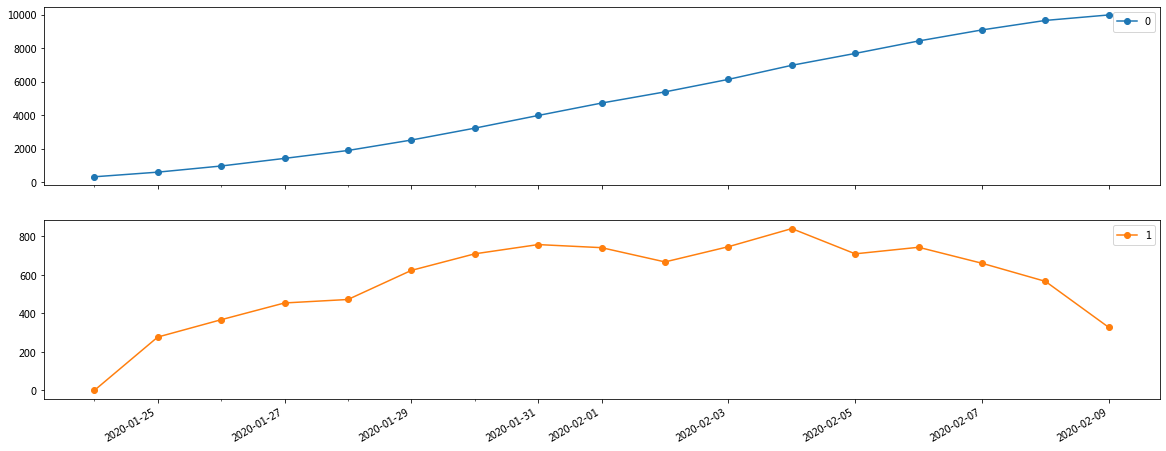

In [23]:
# 非湖北省数据
df_nhubei = df_provconfirm.unstack().drop(('province_confirmedCount', '湖北省'), axis=1 ).fillna(value=0).sum(axis=1)
pd.DataFrame( [df_nhubei, df_nhubei.diff()]).T.fillna(value=0)\
.plot.line(figsize=(20,8), marker='o', subplots=True)

In [24]:
# 扩散指数 = 当天新增确诊病例数 相对于前一天的现有病例数的增长率
# 城市名称 
df['city'] = df['provinceName'] + df['cityName']

# 按日期分组计算每个城市的确诊数量
df_cityconfirm = df[ ['city', 'city_confirmedCount']].groupby([df.index.date, 'city']).first().unstack().fillna(value=0)
# 翻转
df_cityconfirm = df_cityconfirm.T
df_cityconfirm.head()

2020-01-24  2020-01-25  2020-01-26  2020-01-27  \
                    city                                                        
city_confirmedCount 上海市嘉定             0.0         0.0         0.0         0.0   
                    上海市嘉定区            0.0         0.0         0.0         1.0   
                    上海市外地来沪人员         0.0         0.0         0.0        23.0   
                    上海市奉贤             0.0         0.0         0.0         0.0   
                    上海市奉贤区            0.0         0.0         0.0         1.0   

                               2020-01-28  2020-01-29  2020-01-30  2020-01-31  \
                    city                                                        
city_confirmedCount 上海市嘉定             1.0         2.0         2.0         2.0   
                    上海市嘉定区            1.0         0.0         0.0         2.0   
                    上海市外地来沪人员        33.0        47.0        51.0        62.0   
                    上海市奉贤             1.0         5.0         5.0         5.0   
                    上海市奉贤区            1.0         0.0         0.0         5.0   

                               2020-02-01  2020-02-02  2020-02-03  2020-02-04  \
                    city                                                        
city_confirmedCount 上海市嘉定             0.0         0.0         0.0         0.0   
                    上海市嘉定区            2.0         2.0         2.0         3.0   
                    上海市外地来沪人员        73.0        74.0        79.0        81.0   
                    上海市奉贤             0.0         0.0         0.0         0.0   
                    上海市奉贤区            5.0         5.0         5.0         6.0   

                               2020-02-05  2020-02-06  2020-02-07  2020-02-08  \
                    city                                                        
city_confirmedCount 上海市嘉定             0.0         0.0         0.0         0.0   
                    上海市嘉定区            4.0         4.0         5.0         6.0   
                    上海市外地来沪人员        86.0        89.0        93.0        96.0   
                    上海市奉贤             0.0         0.0         0.0         0.0   
                    上海市奉贤区            7.0         8.0         9.0         9.0   

                               2020-02-09  
                    city                   
city_confirmedCount 上海市嘉定             0.0  
                    上海市嘉定区            7.0  
                    上海市外地来沪人员        97.0  
                    上海市奉贤             0.0  
                    上海市奉贤区            9.0

In [26]:
# 计算差额 按行计算差额 axis=1
df_cityconfirm.diff(axis=1).head()

2020-01-24  2020-01-25  2020-01-26  2020-01-27  \
                    city                                                        
city_confirmedCount 上海市嘉定             NaN         0.0         0.0         0.0   
                    上海市嘉定区            NaN         0.0         0.0         1.0   
                    上海市外地来沪人员         NaN         0.0         0.0        23.0   
                    上海市奉贤             NaN         0.0         0.0         0.0   
                    上海市奉贤区            NaN         0.0         0.0         1.0   

                               2020-01-28  2020-01-29  2020-01-30  2020-01-31  \
                    city                                                        
city_confirmedCount 上海市嘉定             1.0         1.0         0.0         0.0   
                    上海市嘉定区            0.0        -1.0         0.0         2.0   
                    上海市外地来沪人员        10.0        14.0         4.0        11.0   
                    上海市奉贤             1.0         4.0         0.0         0.0   
                    上海市奉贤区            0.0        -1.0         0.0         5.0   

                               2020-02-01  2020-02-02  2020-02-03  2020-02-04  \
                    city                                                        
city_confirmedCount 上海市嘉定            -2.0         0.0         0.0         0.0   
                    上海市嘉定区            0.0         0.0         0.0         1.0   
                    上海市外地来沪人员        11.0         1.0         5.0         2.0   
                    上海市奉贤            -5.0         0.0         0.0         0.0   
                    上海市奉贤区            0.0         0.0         0.0         1.0   

                               2020-02-05  2020-02-06  2020-02-07  2020-02-08  \
                    city                                                        
city_confirmedCount 上海市嘉定             0.0         0.0         0.0         0.0   
                    上海市嘉定区            1.0         0.0         1.0         1.0   
                    上海市外地来沪人员         5.0         3.0         4.0         3.0   
                    上海市奉贤             0.0         0.0         0.0         0.0   
                    上海市奉贤区            1.0         1.0         1.0         0.0   

                               2020-02-09  
                    city                   
city_confirmedCount 上海市嘉定             0.0  
                    上海市嘉定区            1.0  
                    上海市外地来沪人员         1.0  
                    上海市奉贤             0.0  
                    上海市奉贤区            0.0

In [27]:
# 取出第二行数据 单独计算扩散指数
v = df_cityconfirm.values[2]
v_diff = df_cityconfirm.diff(axis=1).values[2]
print(10/23) # 手工计算
print(14/33) 

0.43478260869565216
0.42424242424242425


In [28]:
# 处理 v_diff, 去掉第一个数值， 在最后增加一个数值（0）
v_diff = v_diff[1:]
v_diff = np.append(v_diff, 0)
v_diff

array([ 0.,  0., 23., 10., 14.,  4., 11., 11.,  1.,  5.,  2.,  5.,  3.,
        4.,  3.,  1.,  0.])

In [29]:
# 计算扩散指数
v_diff / v

array([       nan,        nan,        inf, 0.43478261, 0.42424242,
       0.08510638, 0.21568627, 0.17741935, 0.01369863, 0.06756757,
       0.02531646, 0.0617284 , 0.03488372, 0.04494382, 0.03225806,
       0.01041667, 0.        ])

In [30]:
# 计算扩散指数
df_tmp = df_cityconfirm.diff(axis=1)
df_kuosan = df_cityconfirm.copy()

index = 0
for v in df_cityconfirm.values:
    v_diff = df_tmp.values[index]
    df_kuosan.values[index] = np.append(v_diff, 0)[1:]/v
    index += 1
    


In [28]:
# 进一步处理，清除空值
df_kuosan = df_kuosan.replace([np.inf, -np.inf], np.nan).fillna(value=0)
df_kuosan.head()

2020-01-24  2020-01-25  2020-01-26  2020-01-27  \
                    city                                                        
city_confirmedCount 上海市嘉定             0.0         0.0         0.0    0.000000   
                    上海市嘉定区            0.0         0.0         0.0    0.000000   
                    上海市外地来沪人员         0.0         0.0         0.0    0.434783   
                    上海市奉贤             0.0         0.0         0.0    0.000000   
                    上海市奉贤区            0.0         0.0         0.0    0.000000   

                               2020-01-28  2020-01-29  2020-01-30  2020-01-31  \
                    city                                                        
city_confirmedCount 上海市嘉定        1.000000    0.000000    0.000000   -1.000000   
                    上海市嘉定区      -1.000000    0.000000    0.000000    0.000000   
                    上海市外地来沪人员    0.424242    0.085106    0.215686    0.177419   
                    上海市奉贤        4.000000    0.000000    0.000000   -1.000000   
                    上海市奉贤区      -1.000000    0.000000    0.000000    0.000000   

                               2020-02-01  2020-02-02  2020-02-03  2020-02-04  \
                    city                                                        
city_confirmedCount 上海市嘉定        0.000000    0.000000    0.000000    0.000000   
                    上海市嘉定区       0.000000    0.000000    0.500000    0.333333   
                    上海市外地来沪人员    0.013699    0.067568    0.025316    0.061728   
                    上海市奉贤        0.000000    0.000000    0.000000    0.000000   
                    上海市奉贤区       0.000000    0.000000    0.200000    0.166667   

                               2020-02-05  2020-02-06  2020-02-07  2020-02-08  \
                    city                                                        
city_confirmedCount 上海市嘉定        0.000000    0.000000    0.000000    0.000000   
                    上海市嘉定区       0.000000    0.250000    0.200000    0.166667   
                    上海市外地来沪人员    0.034884    0.044944    0.032258    0.010417   
                    上海市奉贤        0.000000    0.000000    0.000000    0.000000   
                    上海市奉贤区       0.142857    0.125000    0.000000    0.000000   

                               2020-02-09  
                    city                   
city_confirmedCount 上海市嘉定             0.0  
                    上海市嘉定区            0.0  
                    上海市外地来沪人员         0.0  
                    上海市奉贤             0.0  
                    上海市奉贤区            0.0

In [31]:
# 处理索引列
df_kuosan.index = [x for (i, x) in df_kuosan.index.values]

In [30]:
df_kuosan.head()

,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09
上海市嘉定,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
上海市嘉定区,0.0,0.0,0.0,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.333333,0.000000,0.250000,0.200000,0.166667,0.0
上海市外地来沪人员,0.0,0.0,0.0,0.434783,0.424242,0.085106,0.215686,0.177419,0.013699,0.067568,0.025316,0.061728,0.034884,0.044944,0.032258,0.010417,0.0
上海市奉贤,0.0,0.0,0.0,0.000000,4.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
上海市奉贤区,0.0,0.0,0.0,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.166667,0.142857,0.125000,0.000000,0.000000,0.0


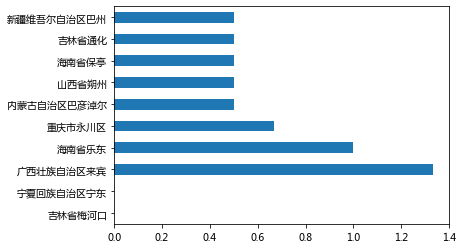

In [45]:
# 绘制图表，找出疫情扩散指数较高的地区 
import datetime
df_kuosan[ datetime.date(2020,2,8)].sort_values(ascending=False)[0:10].plot.barh()

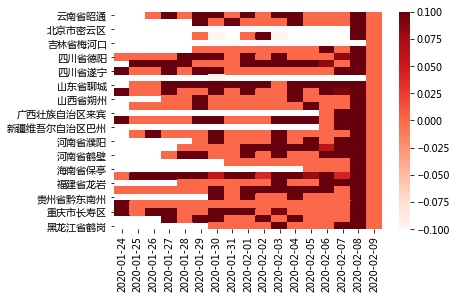

In [33]:
# 绘制热力图 找出疫情扩散指数较高的城市
sns.heatmap( df_kuosan[ df_kuosan[ datetime.date(2020,2,8)]>=0.2 ], cmap = 'Reds' )

In [34]:
# 找出疫情扩散指数在增长的城市
df_kuosan[ df_kuosan[ datetime.date(2020,2,8)]>df_kuosan[ datetime.date(2020,2,7)] ].index

Index(['上海市普陀区', '上海市浦东新区', '上海市静安区', '云南省昭通', '内蒙古自治区巴彦淖尔', '北京市大兴区',
       '北京市海淀区', '吉林省通化', '吉林省长春', '四川省德阳', '四川省成都', '四川省泸州', '四川省遂宁',
       '宁夏回族自治区吴忠', '安徽省池州', '安徽省淮北', '安徽省蚌埠', '山东省泰安', '山东省淄博', '山西省太原',
       '山西省朔州', '山西省运城', '山西省长治', '广东省中山', '广东省江门', '广东省湛江', '广西壮族自治区南宁',
       '新疆维吾尔自治区伊犁州', '江苏省徐州', '江苏省扬州', '江苏省无锡', '江苏省淮安', '江苏省连云港', '江西省九江',
       '江西省南昌', '江西省宜春', '江西省抚州', '江西省景德镇', '河北省保定', '河北省衡水', '河南省商丘', '河南省开封',
       '河南省焦作', '河南省鹤壁', '浙江省台州', '海南省乐东', '海南省保亭', '湖北省天门', '湖北省宜昌', '湖北省恩施州',
       '湖北省荆门', '湖北省襄阳', '湖南省怀化', '湖南省株洲', '湖南省益阳', '湖南省衡阳', '湖南省长沙', '福建省三明',
       '福建省泉州', '福建省福州', '贵州省六盘水', '贵州省贵阳', '贵州省铜仁', '贵州省黔东南州', '重庆市万州区',
       '重庆市合川区', '重庆市巫溪县', '重庆市永川区', '重庆市江北区', '重庆市铜梁区', '重庆市长寿区', '陕西省宝鸡',
       '陕西省渭南', '黑龙江省七台河', '黑龙江省双鸭山', '黑龙江省哈尔滨', '黑龙江省鸡西'],
      dtype='object')

In [65]:
# 绘制的热力图由于数据的规律不均衡，造成整体发黑
plt.figure(figsize=(10,20))
sns.heatmap( df_kuosan[ df_kuosan[ datetime.date(2020,2,8)]>df_kuosan[ datetime.date(2020,2,7)] ])

<Figure size 720x1440 with 2 Axes>

In [35]:
# 扩散指数进行归一化
# 将负数替换为0 
# 将数值进行计算，变为 0-1 
# (x - np.min(x) ) / (np.max(x) - np.min(x))
df_kuosannorm = df_kuosan.applymap(lambda x : x if x>=0 else 0)\
.apply(lambda x : (x - np.min(x) ) / (np.max(x) - np.min(x)), axis=1 )


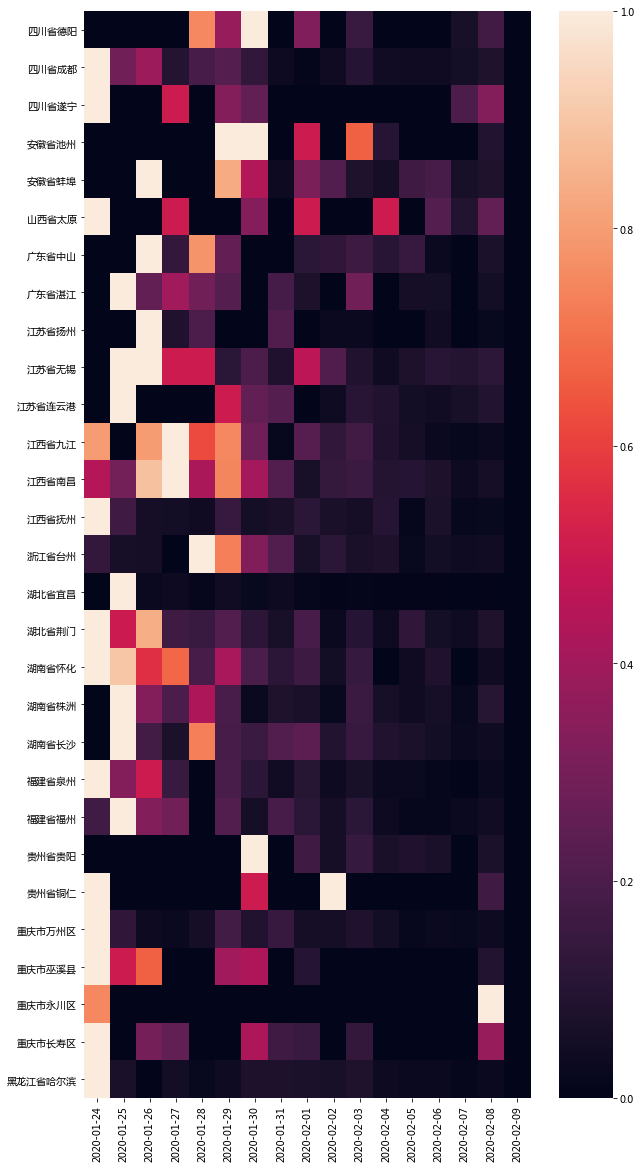

In [36]:
# 绘制的热力图 使用归一化的数据
plt.figure(figsize=(10,20))
sns.heatmap( df_kuosannorm[ df_kuosannorm[ datetime.date(2020,2,8)]>df_kuosannorm[ datetime.date(2020,2,7)]] )
